# MVD 3. cvičení

## 1. část - Stažení a načtení předtrénovaných GloVe slovních reprezentací


### Stažení dat

Pro toto cvičení můžete používat předtrénované Word2Vec nebo GloVe vektory. Následující text se vztahuje ke GloVe vektorům, které byly vybrány z důvodu menší velikosti. 

Základní verzi vektorů lze stáhnout [zde (GloVe link)](https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip).

Wikipedia 2014 + Gigaword 5 (6B tokens, 400K vocab, uncased, 300d vectors, 822 MB download)

Po rozbalení staženého archivu budete mít několik verzí o různé dimenzi vektorů - 50d, 100d, 200d, 300d. Je doporučeno začít pracovat s nejmenšími vektory a na větších spouštět až závěrečné řešení.

### Načtení dat

Data jsou uložena v textovém souboru, kde je na každém řádku slovo a jeho příslušný vektor.

Načtení je vhodné provést do dvou proměnných -> words, vectors. Words bude list o délce *n* a vectors bude matice o velikosti *(n, d)*. 

Zároveň vytvořte slovník word2idx, pomocí kterého lze získat index libovolného slova (pomocí *word2idx['queen']*).

In [6]:
import matplotlib.pyplot as plt
import numpy as np

with open('glove.6B/glove.6B.50D.txt', encoding='utf8') as f:
    data = []
    for line in f:
        data.append(line)
word = []
word2idx = {}
vec = np.zeros((len(data),len(data[0].split(' '))-1))
for i,item in enumerate(data):
    splited = item.replace('\n','').split(' ')
    word.append(splited[0])
    vec[i,:] = np.asarray(splited[1:])
    word2idx[splited[0]] = i
print(vec[0])
print(word[0])
print(word2idx['the'])

[ 4.1800e-01  2.4968e-01 -4.1242e-01  1.2170e-01  3.4527e-01 -4.4457e-02
 -4.9688e-01 -1.7862e-01 -6.6023e-04 -6.5660e-01  2.7843e-01 -1.4767e-01
 -5.5677e-01  1.4658e-01 -9.5095e-03  1.1658e-02  1.0204e-01 -1.2792e-01
 -8.4430e-01 -1.2181e-01 -1.6801e-02 -3.3279e-01 -1.5520e-01 -2.3131e-01
 -1.9181e-01 -1.8823e+00 -7.6746e-01  9.9051e-02 -4.2125e-01 -1.9526e-01
  4.0071e+00 -1.8594e-01 -5.2287e-01 -3.1681e-01  5.9213e-04  7.4449e-03
  1.7778e-01 -1.5897e-01  1.2041e-02 -5.4223e-02 -2.9871e-01 -1.5749e-01
 -3.4758e-01 -4.5637e-02 -4.4251e-01  1.8785e-01  2.7849e-03 -1.8411e-01
 -1.1514e-01 -7.8581e-01]
the
0


## 2. část - Kosinová podobnost

Vytvořte funkci cossim, která bude vracet kosinovu podobnost dvou vstupních vektorů.

<br>
<center>
$
similarity(a,b) = cos(\theta) = \frac{a \cdot b}{\lVert a \lVert \lVert b \lVert}
$
</center>

In [7]:
def cossim(a,b):
    return (a @ b) / ((np.linalg.norm(a)*np.linalg.norm(b)) + 0.0000001)

## 3. část - Slovní analogie

Nejznámější slovní analogií je z Word2Vec $f("king") - f("man") = f("queen") - f("woman")$

1. Vytvořte skript pro hledání analogií $f("king") - f("man") = f("??") - f("woman")$ a vyzkoušejte i nějaké další.
2. Vypište 5 nejpodobnějších slov

In [56]:
#f("king") - f("man") = f("queen") - f("woman")
#f(word1) - word2) = f(???) - f(word3)

def find_word(word1, word2, word3):
    index1 = word2idx[word1]
    index2 = word2idx[word2]
    index3 = word2idx[word3]

    #
    vect1 = vec[index2] - vec[index3]
    maxsim = 0
    maxname = ''
    out = []
    for name in word:
        index4 = word2idx[name]
        vect2 = vec[index1] - vec[index4]
        sim = cossim(vect1,vect2)
        if sim > maxsim:
            maxsim = sim
            out.append(name)

    return out

In [49]:
#edit verze
def find_word2(word1, word2, word3):
    index1 = word2idx[word1]
    index2 = word2idx[word2]
    index3 = word2idx[word3]
    vect1 = vec[index2] - vec[index3]
    out = []
    for name in word:
        index4 = word2idx[name]
        vect2 = vec[index1] - vec[index4]
        sim = cossim(vect1,vect2)
        out.append(sim)

    return out

In [57]:
print('####1####')
# f("king") - f("man") = f("??") - f("woman")
out_words = find_word('king','man','woman')[-5:]
print(out_words)
#2
print('####2#### \n')
out_words2 = find_word('math','numbers','words')[-5:]
print(out_words2)

####1####
['her', 'wife', 'mother', 'daughter', 'princess']
####2#### 

['wrote', 'written', 'language', 'words', 'sanskrit']


### Bonus - Vytvořte vizualizaci slovních analogií

Pro získání bonusového bodu je potřeba vytvořit vizualizaci slovních analogií (redukce dimenze + vizualizace).

In [31]:
def find_sim(close_word):
    sim = []
    index1 = word2idx[close_word]
    vect1 = vec[index1]
    for i, name in enumerate(word):
        index2 = word2idx[name]
        vect2 = vec[index2]
        sim.append(cossim(vect1,vect2))

    return sim

puppy
horse
dogs
cat
dog
husband
grandmother
wife
daughter
mother
her
mother
man
girl
woman
rat
monkey
rabbit
dog
cat
turbine
compressor
transformer
generators
generator


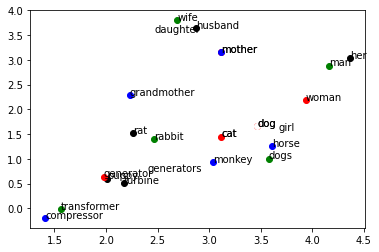

In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import copy

colors = ['black','blue','green','white','red']
search_word = ['dog','mother', 'woman','cat','generator']
pca = PCA(n_components=2)
data = []
new_vec = copy.deepcopy(vec)
pca.fit(new_vec)

for sw in search_word:
    dats = find_sim(sw)
    res = sorted(range(len(dats)), key = lambda sub: dats[sub])[-5:]
    for i in range(5):
        print(word[res[i]])
        transformed = pca.transform(new_vec[res[i]].reshape(1, -1))
        data.append(transformed)
        plt.scatter(transformed[0][0],transformed[0][1], color = colors[i] )
        plt.annotate(word[res[i]], (transformed[0][0], transformed[0][1]))

